**1.**  

Перед вами ряд значений среднегодового объёма популяции рыси:
![1.png](../../Data/1.png)
Какая из автокорреляционных функций соответствует этому ряду?
![2.PNG](../../Data/2.PNG)


___

**2.**

Перед вами ряд уровней среднемесячной номинальной заработной платы в России:
![3.png](../../Data/3.png)

Какими свойствами обладает этот ряд?


- **Выраженная годовая сезонность**


- Циклические колебания, соответствующие периодам активности в экономике


- **Повышающийся тренд**


- **Автокоррелированность**

___

**3.**

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд и постройте его график. Какой из приведённых ниже графиков у вас получился?

In [1]:
import pandas as pd


milk = pd.read_csv(
    '../../Data/monthly-milk-production.csv',
    ';',
    index_col=['month'],
    parse_dates=['month'],
    dayfirst=True
)

milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


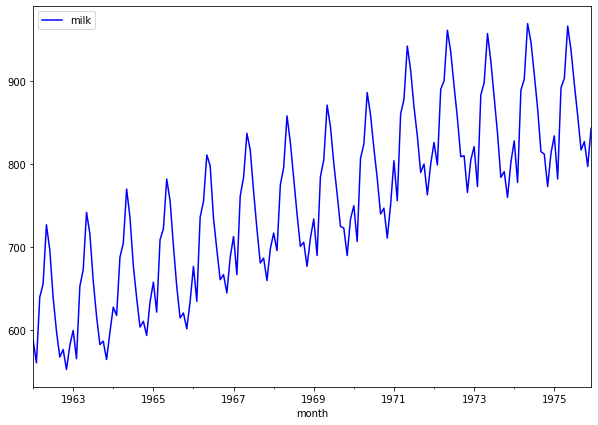

In [45]:
milk.plot(figsize=(10,7), color="b");

---

**4.**  

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:

import statsmodels.api as sm  
sm.tsa.stattools.adfuller(ряд)

Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [31]:
import statsmodels.api as sm

res = sm.tsa.stattools.adfuller(milk.milk.values)
print("p_value =", round(res[1], 2))

p_value = 0.63


___

**5.**  

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [42]:
print(
    round(
        sum(milk.milk / milk.index.days_in_month),
        2
    )
)


4166.33
